In [2]:
import pandas as pd
import numpy as np

In [3]:
# We Have Chosen FIFA 22 player data for our dataset

players = pd.read_csv('/Users/ISAACABREHAM/Downloads/players_22.csv')

/var/folders/tc/w0kp88z15y7ghkgd9_vdxk140000gn/T/ipykernel_6843/25676849.py:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('/Users/ISAACABREHAM/Downloads/players_22.csv')


In [4]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [5]:
# Creating Features to Cluster our players on

features = ["overall", "potential", "wage_eur", "value_eur","age"]

In [6]:
# Getting rid of null values in the selected columns

players = players.dropna(subset=features)

In [7]:
# Creating a copy of our data 

data = players[features].copy()

In [8]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [9]:
# Rescaling the max and min values on the column to 1-10
# Higher numbers hold more dominance so think how eg value_eur effects

data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

data.describe() # Here we can see our min and max is 1 and 10

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [11]:
# Initializing Random Centroids
# .apply iterates through each columns in the data
# calling x.sample selects a single random value from the column
# We want to return a float becuase without it comes out as a pandas series we want iot numerical

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) 
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) # this combines each series to one data frame

In [12]:
centroids = random_centroids(data, 5)

In [13]:
centroids 

# Each column is a centroid
# Each row is a different feature


,0,1,2,3,4
overall,5.891304,6.478261,8.043478,5.108696,5.304348
potential,5.304348,6.086957,5.500000,6.086957,5.695652
wage_eur,1.012876,2.377682,1.012876,1.476395,1.321888
value_eur,1.023939,1.212994,1.009325,1.012341,1.021620
age,4.666667,5.333333,4.666667,3.666667,2.000000


In [14]:
# labelling each data point based on the clusters centre
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1))) # Calculating the distance between centroid and each data point
    return distances.idxmin(axis=1) # Finding the cluster assignment to each player

In [15]:
labels = get_labels(data, centroids)

In [16]:
# Seeing how many players are in each cluster 

labels.value_counts() # .value_counts

0    6717
3    5348
4    4886
1    2199
2      15
dtype: int64

In [17]:
#Updating Centroid values

In [18]:
#The geometric mean is our new centroids
# The geometric mean is a measure of central tendency that is calculated by multiplying together a set of numbers and then taking the nth root (where n is the number of values).
# .exp method lets us enter our own exponent

def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T #data is split up by label and new center are recalculated by geometric mean

In [19]:
from sklearn.decomposition import PCA  #pca = Principles Components analysis, helps visualize data
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [20]:
#pca = Principles Components analysis, helps visualize data right now we are working with multi demensional data
#clear_output is ging to clear the graph and rhelp refresh



In [21]:
# CREATING OUR FUNCTION TO PLOT OUR CLUSTER 

# turning our data into 2d data

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2) # initializing pca model, turns data to two columns
    data_2d = pca.fit_transform(data) # this fits and transofrms our data into the model
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    
    #plotting viz
    
    plt.title(f'Iteration{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
            

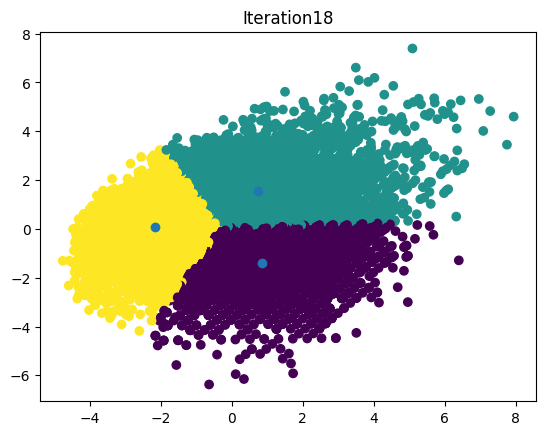

In [22]:
# Pulling al the components of the algorithm together

max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k )
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [23]:
centroids

,0,1,2
overall,4.781960,5.807503,3.205672
potential,4.506813,6.497870,4.930905
wage_eur,1.118498,1.420500,1.028564
value_eur,1.044909,1.285685,1.026655
age,5.467648,3.598215,2.514741


In [25]:
# cluster 0 has organized itself as player who have reach maxed their potential

players[labels ==0][["short_name"] + features] 

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


In [26]:
# Cluster 1 has organized itself as star players

players[labels ==1][["short_name"] + features] 

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,3000.0,1500000.0,17
13256,L. Bate,63,83,5000.0,1300000.0,18
13351,Llabrés,63,81,3000.0,1200000.0,19
14144,H. Mejbri,62,84,6000.0,1300000.0,18


In [27]:
# Cluster 2 has organized itself by lowest wages.

players[labels ==2][["short_name"] + features] 

,short_name,overall,potential,wage_eur,value_eur,age
7025,Sandeiro Leal,68,68,7000.0,1400000.0,21
8028,Narcisso Mau,67,67,4000.0,1100000.0,21
8029,Botelhinonsa,67,67,4000.0,1100000.0,21
8030,Edenildo Lagoas,67,67,3000.0,1100000.0,21
8040,Dener Rolim,67,67,4000.0,1200000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [28]:
#Testing our algoithm

from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(3)
kmeans.fit(data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [30]:
centroids = kmeans.cluster_centers_

In [31]:
#Each column is a centroid each is a feature
# As we look above our cluster is relatively the same


pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,3.599859,6.231096,4.800991
potential,5.205869,6.623746,4.503972
wage_eur,1.039947,1.657093,1.112902
value_eur,1.035792,1.413686,1.040011
age,2.712386,4.139879,5.609167
